## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  55.849353   223.284757  0.212764  9.378547  0.735282
1  70.190614  1332.399230  0.026272  4.974762  0.417398
2  79.400302  1434.936442  0.939959  1.366582  1.526997
3   2.131908  1658.833243  0.382776  4.389229  1.471802
4  49.018901  1726.070054  0.971141  8.990663  1.531026


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0045383	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9945050	total: 70.2ms	remaining: 35s
2:	learn: 0.9825331	total: 70.9ms	remaining: 23.6s
3:	learn: 0.9713626	total: 71.6ms	remaining: 17.8s
4:	learn: 0.9588831	total: 72.2ms	remaining: 14.4s
5:	learn: 0.9482793	total: 72.8ms	remaining: 12.1s
6:	learn: 0.9383355	total: 73.3ms	remaining: 10.4s
7:	learn: 0.9278375	total: 73.9ms	remaining: 9.16s
8:	learn: 0.9167952	total: 74.5ms	remaining: 8.2s
9:	learn: 0.9068771	total: 75.1ms	remaining: 7.43s
10:	learn: 0.8988363	total: 75.5ms	remaining: 6.79s
11:	learn: 0.8874211	total: 76.1ms	remaining: 6.26s
12:	learn: 0.8779371	total: 76.6ms	remaining: 5.81s
13:	learn: 0.8687772	total: 77.1ms	remaining: 5.43s
14:	learn: 0.8569160	total: 77.7ms	remaining: 5.1s
15:	learn: 0.8479046	total: 78.2ms	remaining: 4.81s
16:	learn: 0.8368099	total: 78.8ms	remaining: 4.55s
17:	learn: 0.8279800	total: 79.3ms	remaining: 4.33s
18:	learn: 0.8207572	total: 79.8ms	remaining: 4.

84:	learn: 0.4318796	total: 110ms	remaining: 1.19s
85:	learn: 0.4279300	total: 111ms	remaining: 1.18s
86:	learn: 0.4249697	total: 111ms	remaining: 1.17s
87:	learn: 0.4212820	total: 112ms	remaining: 1.16s
88:	learn: 0.4169309	total: 112ms	remaining: 1.15s
89:	learn: 0.4140229	total: 112ms	remaining: 1.14s
90:	learn: 0.4105243	total: 113ms	remaining: 1.13s
91:	learn: 0.4069116	total: 113ms	remaining: 1.12s
92:	learn: 0.4040599	total: 114ms	remaining: 1.11s
93:	learn: 0.4009021	total: 114ms	remaining: 1.1s
94:	learn: 0.3970282	total: 115ms	remaining: 1.09s
95:	learn: 0.3943518	total: 115ms	remaining: 1.09s
96:	learn: 0.3914763	total: 116ms	remaining: 1.08s
97:	learn: 0.3884655	total: 117ms	remaining: 1.07s
98:	learn: 0.3860749	total: 117ms	remaining: 1.06s
99:	learn: 0.3825258	total: 117ms	remaining: 1.06s
100:	learn: 0.3790579	total: 118ms	remaining: 1.05s
101:	learn: 0.3766359	total: 119ms	remaining: 1.04s
102:	learn: 0.3742116	total: 119ms	remaining: 1.04s
103:	learn: 0.3708230	total: 

246:	learn: 0.1580624	total: 187ms	remaining: 571ms
247:	learn: 0.1573451	total: 188ms	remaining: 570ms
248:	learn: 0.1567482	total: 188ms	remaining: 568ms
249:	learn: 0.1562025	total: 189ms	remaining: 567ms
250:	learn: 0.1556265	total: 189ms	remaining: 565ms
251:	learn: 0.1549943	total: 190ms	remaining: 564ms
252:	learn: 0.1542348	total: 190ms	remaining: 562ms
253:	learn: 0.1536611	total: 191ms	remaining: 560ms
254:	learn: 0.1529927	total: 191ms	remaining: 559ms
255:	learn: 0.1524118	total: 192ms	remaining: 557ms
256:	learn: 0.1517107	total: 192ms	remaining: 556ms
257:	learn: 0.1512124	total: 193ms	remaining: 555ms
258:	learn: 0.1504372	total: 193ms	remaining: 553ms
259:	learn: 0.1498574	total: 194ms	remaining: 552ms
260:	learn: 0.1490208	total: 194ms	remaining: 550ms
261:	learn: 0.1485465	total: 195ms	remaining: 549ms
262:	learn: 0.1480467	total: 195ms	remaining: 548ms
263:	learn: 0.1475233	total: 196ms	remaining: 546ms
264:	learn: 0.1470402	total: 197ms	remaining: 545ms
265:	learn: 

466:	learn: 0.0854862	total: 294ms	remaining: 335ms
467:	learn: 0.0853839	total: 294ms	remaining: 335ms
468:	learn: 0.0852835	total: 295ms	remaining: 334ms
469:	learn: 0.0850817	total: 295ms	remaining: 333ms
470:	learn: 0.0845767	total: 296ms	remaining: 332ms
471:	learn: 0.0842794	total: 296ms	remaining: 331ms
472:	learn: 0.0841834	total: 296ms	remaining: 330ms
473:	learn: 0.0839901	total: 297ms	remaining: 330ms
474:	learn: 0.0836130	total: 297ms	remaining: 329ms
475:	learn: 0.0835205	total: 298ms	remaining: 328ms
476:	learn: 0.0833468	total: 299ms	remaining: 327ms
477:	learn: 0.0831599	total: 299ms	remaining: 327ms
478:	learn: 0.0828745	total: 300ms	remaining: 326ms
479:	learn: 0.0827850	total: 300ms	remaining: 325ms
480:	learn: 0.0824913	total: 301ms	remaining: 324ms
481:	learn: 0.0824313	total: 301ms	remaining: 323ms
482:	learn: 0.0821537	total: 302ms	remaining: 323ms
483:	learn: 0.0818660	total: 302ms	remaining: 322ms
484:	learn: 0.0817788	total: 302ms	remaining: 321ms
485:	learn: 

629:	learn: 0.0576338	total: 371ms	remaining: 218ms
630:	learn: 0.0574799	total: 371ms	remaining: 217ms
631:	learn: 0.0573447	total: 372ms	remaining: 216ms
632:	learn: 0.0572032	total: 372ms	remaining: 216ms
633:	learn: 0.0570018	total: 373ms	remaining: 215ms
634:	learn: 0.0567945	total: 373ms	remaining: 214ms
635:	learn: 0.0565175	total: 374ms	remaining: 214ms
636:	learn: 0.0562487	total: 374ms	remaining: 213ms
637:	learn: 0.0560965	total: 374ms	remaining: 212ms
638:	learn: 0.0559478	total: 375ms	remaining: 212ms
639:	learn: 0.0558103	total: 375ms	remaining: 211ms
640:	learn: 0.0556759	total: 376ms	remaining: 210ms
641:	learn: 0.0555271	total: 376ms	remaining: 210ms
642:	learn: 0.0554275	total: 377ms	remaining: 209ms
643:	learn: 0.0553297	total: 377ms	remaining: 209ms
644:	learn: 0.0551850	total: 378ms	remaining: 208ms
645:	learn: 0.0550894	total: 378ms	remaining: 207ms
646:	learn: 0.0549954	total: 379ms	remaining: 207ms
647:	learn: 0.0548548	total: 379ms	remaining: 206ms
648:	learn: 

852:	learn: 0.0333893	total: 477ms	remaining: 82.2ms
853:	learn: 0.0333196	total: 477ms	remaining: 81.6ms
854:	learn: 0.0332513	total: 478ms	remaining: 81ms
855:	learn: 0.0331505	total: 478ms	remaining: 80.5ms
856:	learn: 0.0331077	total: 479ms	remaining: 79.9ms
857:	learn: 0.0330657	total: 479ms	remaining: 79.3ms
858:	learn: 0.0330243	total: 480ms	remaining: 78.7ms
859:	learn: 0.0329579	total: 480ms	remaining: 78.2ms
860:	learn: 0.0329175	total: 481ms	remaining: 77.6ms
861:	learn: 0.0328653	total: 481ms	remaining: 77ms
862:	learn: 0.0328235	total: 481ms	remaining: 76.4ms
863:	learn: 0.0327837	total: 482ms	remaining: 75.8ms
864:	learn: 0.0327006	total: 482ms	remaining: 75.3ms
865:	learn: 0.0326615	total: 483ms	remaining: 74.7ms
866:	learn: 0.0325149	total: 483ms	remaining: 74.1ms
867:	learn: 0.0324344	total: 484ms	remaining: 73.5ms
868:	learn: 0.0322912	total: 484ms	remaining: 73ms
869:	learn: 0.0321506	total: 485ms	remaining: 72.4ms
870:	learn: 0.0320733	total: 485ms	remaining: 71.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

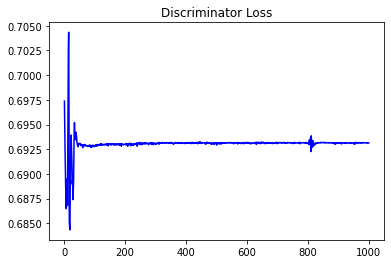

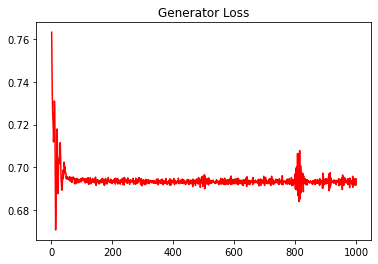

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3092385478413787


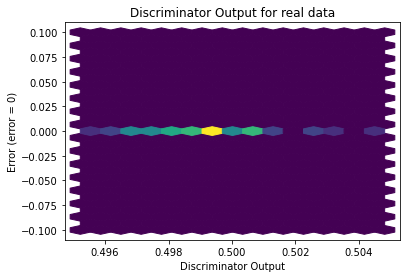

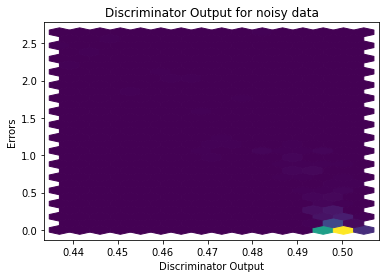

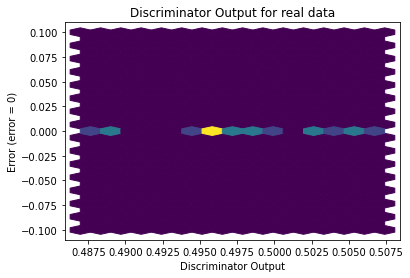

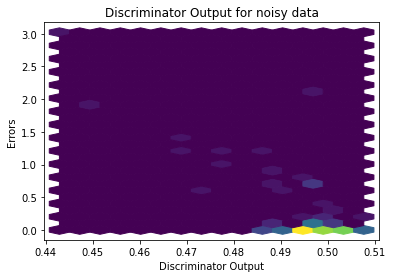

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


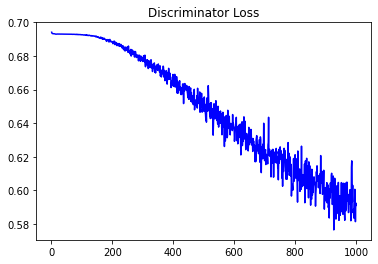

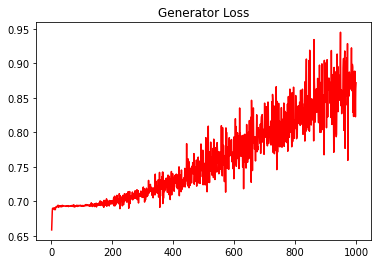

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.29962304390084943


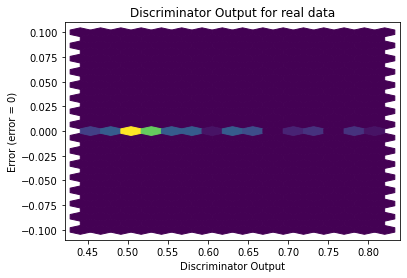

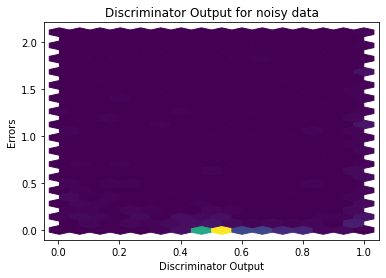

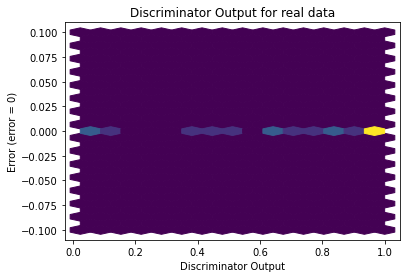

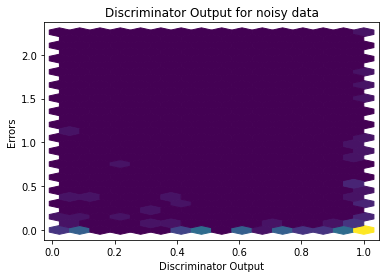

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
